In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [58]:
connection = sqlite3.connect("../db.sqlite3")
query = """
SELECT orditm.id, orditm.quantity, ord.datetime as order_datetime, prd.price as dish_price, prd.name as dish_name
FROM restaurant_orderitem as orditm
JOIN restaurant_order as ord ON orditm.order_id = ord.id
JOIN restaurant_product as prd ON orditm.product_id = prd.id
"""
df_from_sql = pd.read_sql_query(query, connection)
connection.close()
df_from_sql.to_csv("../restaurant_data.csv", index=False)
df = pd.read_csv("../restaurant_data.csv")
df["order_datetime"] = pd.to_datetime(df["order_datetime"])
df

,id,quantity,order_datetime,dish_price,dish_name
0,1,2,2019-08-03 20:25:00,0.80,Plain Papadum
1,2,1,2019-08-03 20:25:00,12.95,King Prawn Balti
2,3,1,2019-08-03 20:25:00,2.95,Garlic Naan
3,4,1,2019-08-03 20:25:00,3.95,Mushroom Rice
4,5,1,2019-08-03 20:25:00,8.95,Paneer Tikka Masala
...,...,...,...,...,...
74813,74814,2,2016-05-18 18:53:00,17.95,House Red wine 75cl
74814,74815,2,2016-05-14 19:28:00,17.95,House Red wine 75cl
74815,74816,2,2016-05-10 13:18:00,17.95,House Red wine 75cl
74816,74817,1,2016-04-07 19:04:00,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

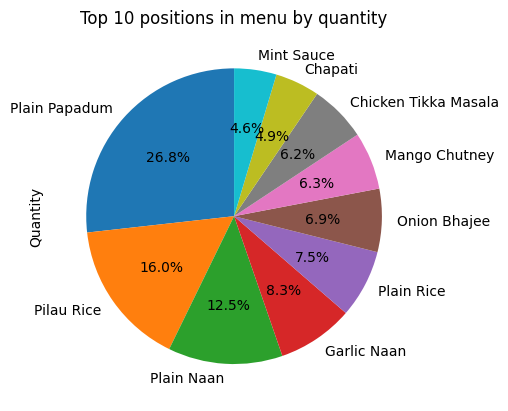

In [51]:
df_top_dishes = df.groupby(["dish_name"], as_index=False)["quantity"].sum().sort_values(by="quantity", ascending=False).head(10)

plt.pie(df_top_dishes["quantity"], labels=df_top_dishes["dish_name"], autopct="%1.1f%%", startangle=90)
plt.ylabel("Quantity")
plt.title("Top 10 positions in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

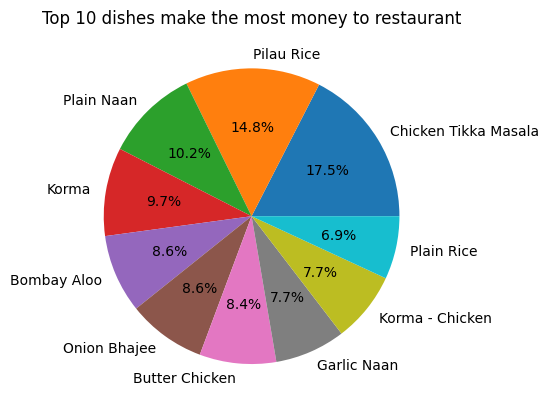

In [61]:
df["item_price"] = df["dish_price"] * df["quantity"]
df_item_prices = df.groupby(["dish_name"], as_index=False)["item_price"].sum().sort_values(by="item_price", ascending=False).head(10)
plt.pie(df_item_prices["item_price"], labels=df_item_prices["dish_name"], autopct="%1.1f%%")
plt.title("Top 10 dishes make the most money to restaurant")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

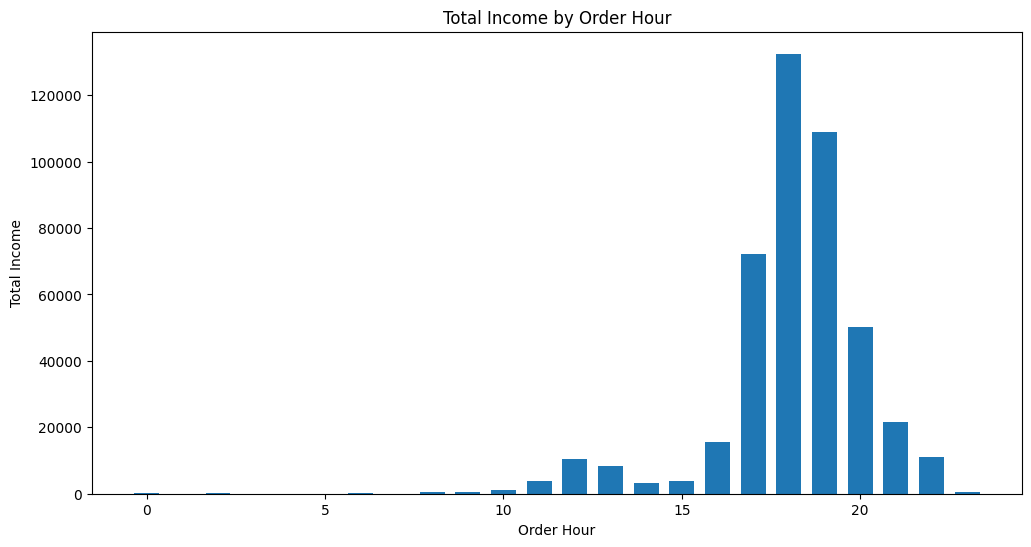

In [69]:
df["order_hour"] = df["order_datetime"].dt.hour
df_hour = df.groupby(["order_hour"], as_index=False)["item_price"].sum()
plt.figure(figsize=(12, 6))
plt.bar(df_hour["order_hour"], df_hour["item_price"], width=0.7)
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Income by Order Hour")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

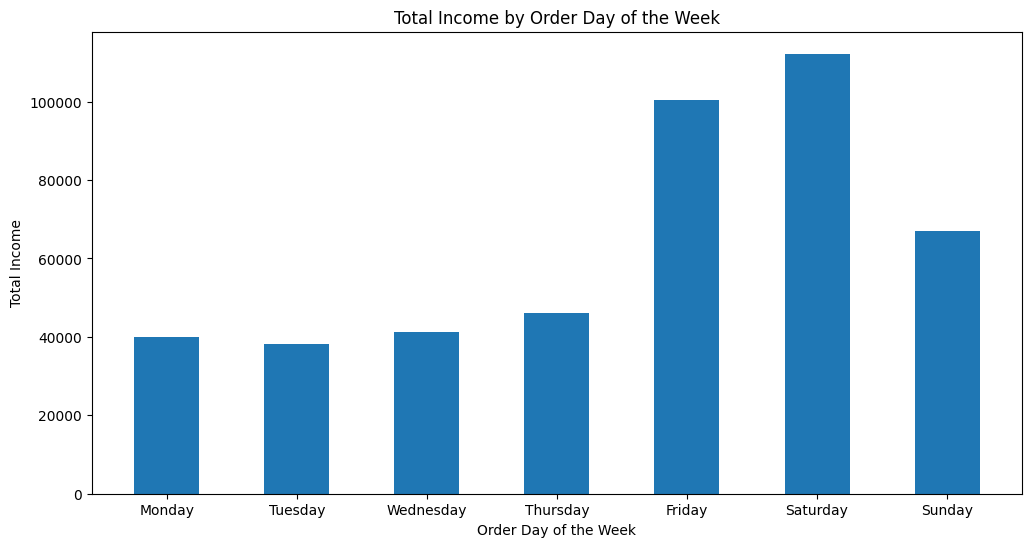

In [80]:
df["order_day_of_week"] = df["order_datetime"].dt.dayofweek
day_of_week = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df["order_day_of_week"] = df["order_day_of_week"].map(day_of_week)
df_day_income = df.groupby(["order_day_of_week"], as_index=False)["item_price"].sum()
day_in_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_income["order_day_of_week"] = pd.Categorical(df_day_income["order_day_of_week"], categories=day_in_order, ordered=True)
df_day_income = df_day_income.sort_values("order_day_of_week")

plt.figure(figsize=(12, 6))
plt.bar(df_day_income["order_day_of_week"], df_day_income["item_price"], width=0.5)
plt.xlabel("Order Day of the Week")
plt.ylabel("Total Income")
plt.title("Total Income by Order Day of the Week")
plt.show()